## Day 24 SVM
19/Jan/2022, Wednesday

In [2]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
iris = load_iris(return_X_y=False)

In [5]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
X = iris.data[:,2:]
y = iris.target
print(X.shape, y.shape)

(150, 2) (150,)


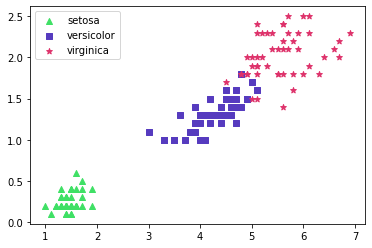

In [11]:
colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i,name in enumerate(iris.target_names):
    samples = (y==i) # i=0, 1, 2
    plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=name)
plt.legend()
plt.show()

In [19]:
samples = (y==0) | (y==1)
samples

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [20]:
X, y = X[samples], y[samples]
print(X.shape, y.shape)

(100, 2) (100,)


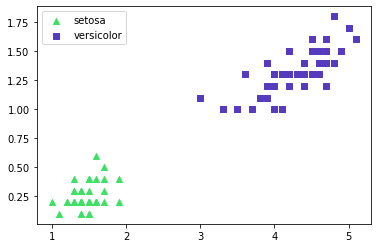

In [21]:
colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i,name in enumerate(iris.target_names[:-1]):
    samples = (y==i) # i=0, 1, 2
    plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=name)
plt.legend()
plt.show()

## Classification
### Linear SVC

In [22]:
from sklearn.svm import LinearSVC

In [23]:
lin_svc = LinearSVC()

In [24]:
lin_svc.fit(X, y)

LinearSVC()

In [26]:
lin_svc.predict([[2.4, 1]])

array([1])

### Decision Boundary

In [38]:
f1 = np.linspace(X[:,0].min(), X[:,0].max(), 80)
f2 = np.linspace(X[:,1].min(), X[:,1].max(), 80)
f1, f2 = np.meshgrid(f1, f2)
X_test = np.concatenate([f1.reshape(-1,1), f2.reshape(-1,1)], axis=1)
print(X_test.shape)

(6400, 2)


In [39]:
ypred = lin_svc.predict(X_test)

In [35]:
from matplotlib.colors import ListedColormap

In [36]:
cmap = ListedColormap(["#c6f79e", "#cbadff"])

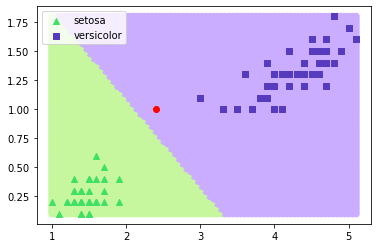

In [42]:
plt.scatter(X_test[:,0], X_test[:,1], c=ypred, cmap=cmap)

colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i,name in enumerate(iris.target_names[:-1]):
    samples = (y==i) # i=0, 1, 2
    plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=name)
plt.legend()

plt.scatter(2.4, 1, c='r')
plt.show()

C is a hyperparameter  
More C, Hard Margin Classification  
Less C, soft margin classification  

In [44]:
X_ = np.concatenate([X, [[3, 1]]], axis=0)
print(X_.shape)

(101, 2)


In [45]:
y_ = np.concatenate([y, [0]], axis=0)
print(y_.shape)

(101,)


In [46]:
linsvc2 = LinearSVC(C=1)
linsvc2.fit(X_, y_)

LinearSVC(C=1)

In [47]:
ypred2 = linsvc2.predict(X_test)

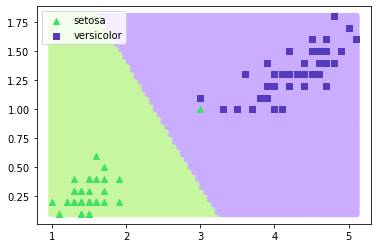

In [48]:
plt.scatter(X_test[:,0], X_test[:,1], c=ypred2, cmap=cmap)

colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i,name in enumerate(iris.target_names[:-1]):
    samples = (y_==i) # i=0, 1, 2
    plt.scatter(X_[samples,0], X_[samples,1], c=colors[i], marker=markers[i], label=name)
plt.legend()

plt.show()

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


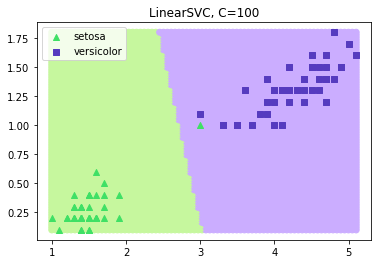

In [51]:
linsvc3 = LinearSVC(C=100)
linsvc3.fit(X_, y_)
ypred3 = linsvc3.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1], c=ypred3, cmap=cmap)

colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i,name in enumerate(iris.target_names[:-1]):
    samples = (y_==i) # i=0, 1, 2
    plt.scatter(X_[samples,0], X_[samples,1], c=colors[i], marker=markers[i], label=name)
plt.legend()
plt.title("LinearSVC, C=100")
plt.show()

In [52]:
from sklearn.svm import SVC

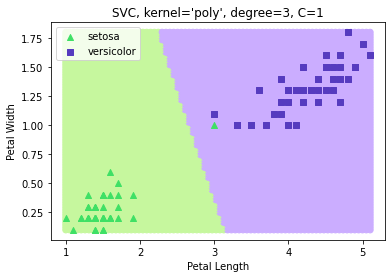

In [54]:
svc = SVC(kernel='poly', degree=3, C=1) # Soft margin classification, allows margin violation
svc.fit(X_,y_)
ypred = svc.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1], c=ypred, cmap=cmap)

colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i,name in enumerate(iris.target_names[:-1]):
    samples = (y_==i) # i=0, 1, 2
    plt.scatter(X_[samples,0], X_[samples,1], c=colors[i], marker=markers[i], label=name)
plt.legend()
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("SVC, kernel='poly', degree=3, C=1")
plt.show()

### SVC with kernel Trick

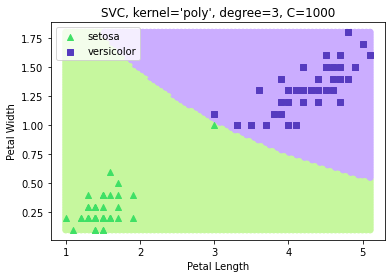

In [56]:
svc2 = SVC(kernel='poly', degree=2, C=1000) # Hard margin classification, doesn't allow margin violation
svc2.fit(X_,y_)
ypred2 = svc2.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1], c=ypred2, cmap=cmap)

colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i,name in enumerate(iris.target_names[:-1]):
    samples = (y_==i) # i=0, 1, 2
    plt.scatter(X_[samples,0], X_[samples,1], c=colors[i], marker=markers[i], label=name)
plt.legend()
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("SVC, kernel='poly', degree=3, C=1000")
plt.show()

In [57]:
from sklearn.datasets import make_moons

(200, 2) (200,)


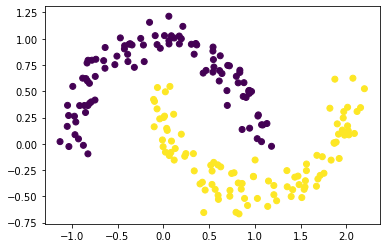

In [61]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=50)
print(X.shape, y.shape)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [63]:
f1 = np.linspace(X[:,0].min(), X[:,0].max(), 80)
f2 = np.linspace(X[:,1].min(), X[:,1].max(), 80)
f1, f2 = np.meshgrid(f1, f2)
X_test2 = np.concatenate([f1.reshape(-1,1), f2.reshape(-1,1)], axis=1)
print(X_test2.shape)

(6400, 2)


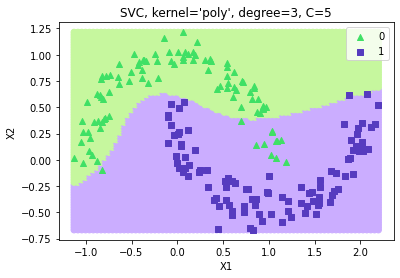

In [67]:
svc = SVC(kernel='poly', degree=3, C=5) # Soft margin classification, allow margin violation
svc.fit(X,y)
ypred = svc.predict(X_test2)

plt.scatter(X_test2[:,0], X_test2[:,1], c=ypred, cmap=cmap)

colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i in [0,1]:
    samples = (y==i) # i=0, 1, 2
    plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=i)
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVC, kernel='poly', degree=3, C=5")
plt.show()

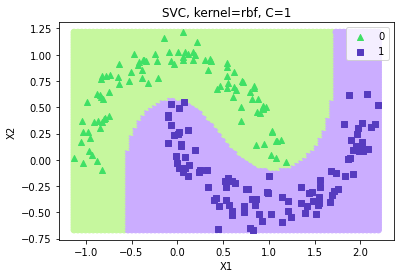

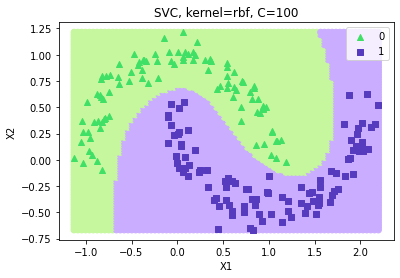

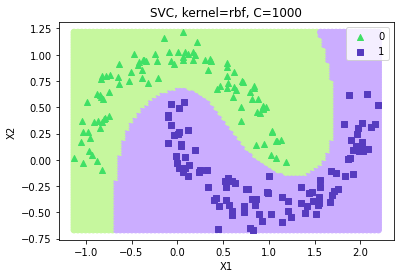

In [78]:
cs = [1, 100, 1000]
ker = 'rbf'
for c in cs: 
    svc = SVC(kernel=ker, C=c) # Soft margin classification, doesn't allow margin violation
    svc.fit(X,y)
    ypred = svc.predict(X_test2)

    plt.scatter(X_test2[:,0], X_test2[:,1], c=ypred, cmap=cmap)

    colors = ["#3fe065", "#563bbf", "#de316a"]
    markers = ["^", "s", "*"]
    for i in [0,1]:
        samples = (y==i) # i=0, 1, 2
        plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=i)
    plt.legend()
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(f"SVC, kernel={ker}, C={c}")
    plt.show()

## Regression

In [80]:
from sklearn.svm import LinearSVR, SVR
from sklearn.datasets import make_regression

(200, 1) (200,)


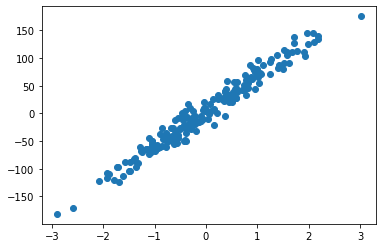

In [89]:
X, y = make_regression(n_samples=200,
    n_features=1, noise=14, bias=5, random_state = 30)
print(X.shape, y.shape)

plt.scatter(X, y)
plt.show()

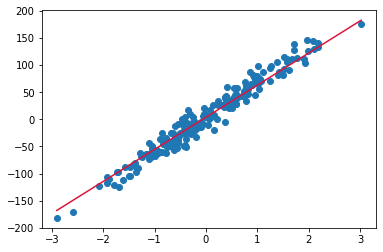

In [90]:
reg = LinearSVR()
reg.fit(X, y)

x_test = np.linspace(X.min(), X.max(), 50).reshape(-1,1)
ypred = reg.predict(x_test.reshape(-1,1))

plt.scatter(X, y)
plt.plot(x_test, ypred, c='crimson')
plt.show()

(50,)


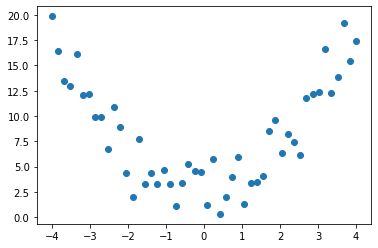

In [92]:
m = 50
x = np.linspace(-4, 4, m)
noise = np.random.randn(m,)
print(noise.shape)
y = x**2 + 2*noise + 3

plt.scatter(x, y)
plt.show()

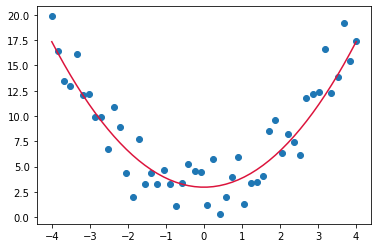

In [101]:
svr = SVR(kernel='poly', degree=2, C=1)
svr.fit(x.reshape(-1,1), y)
ypred = svr.predict(x.reshape(-1,1))
plt.scatter(x, y)
plt.plot(x, ypred, c='crimson')
plt.show()

In [102]:
svr.score(x.reshape(-1,1), y)

0.8544505817968423

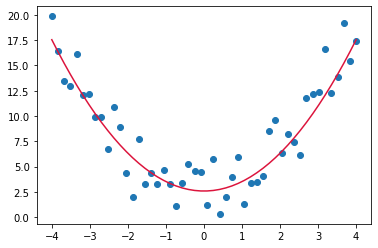

In [99]:
svr = SVR(kernel='poly', degree=2, C=10)
svr.fit(x.reshape(-1,1), y)
ypred = svr.predict(x.reshape(-1,1))
plt.scatter(x, y)
plt.plot(x, ypred, c='crimson')
plt.show()

In [100]:
svr.score(x.reshape(-1,1), y)

0.8537789610385318